**IMPORT LIBRARY**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import copy
from cvxopt import matrix, solvers

**GENERATE AND VISUALIZE DATA**

In [ ]:
X, y = make_blobs(n_samples = 5000, centers = 2,
                  random_state = 22520833, cluster_std = 0.7)
y[ y == 0 ] = -1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 19)

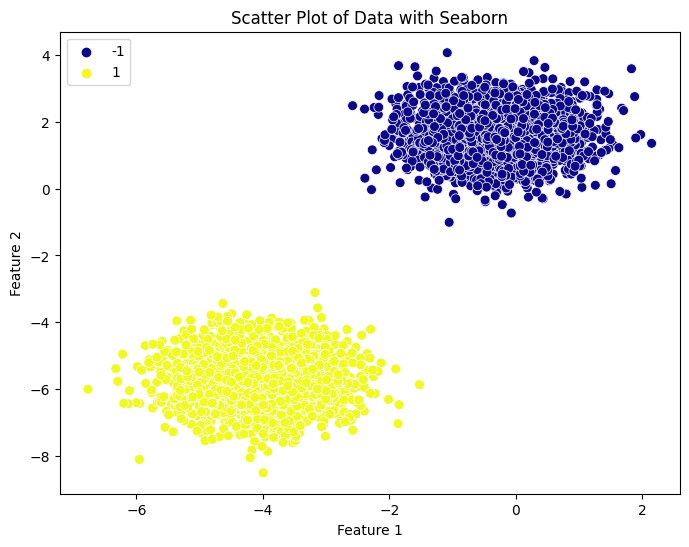

In [ ]:
# Create a scatter plot using seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train.flatten(), palette="plasma", s=50, edgecolor='w', linewidth=0.5)

# Add labels and title
plt.title("Scatter Plot of Data with Seaborn")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

**DRAW POSIBILE BOUNDARIES**

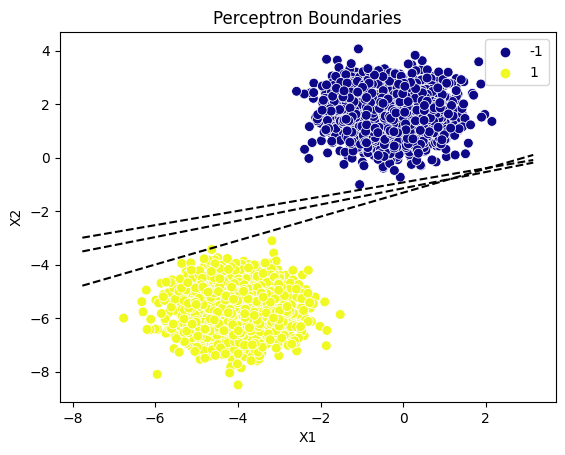

In [ ]:
num_trainings = 3
boundaries = []

for i in range(num_trainings):
    model = Perceptron(random_state = i )

    model.fit(X_train, y_train)

    # Lấy các tham số của đường boundary
    coef = model.coef_[0]
    intercept = model.intercept_

    # Tính toán đường boundary từ các tham số
    x_boundary = np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100)
    y_boundary = -(coef[0] / coef[1]) * x_boundary - (intercept / coef[1])
    boundaries.append((x_boundary, y_boundary))

# Vẽ đường boundary và dữ liệu
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette="plasma", s=50)
for boundary in boundaries:
    plt.plot(boundary[0], boundary[1], 'k--')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Boundaries')
plt.show()

**INITIALIZE MODEL SVM**

In [ ]:
class SVM:
    def __init__(self):
        self.X = None
        self.y = None
        self.w = None
        self.b = None
    def fit(self, X, y):
        self.X = copy.deepcopy(X)
        for i in range(self.X.shape[0]):
          self.X[i] *= int(y[i])

        self.X = self.X.T
        self.y = y.reshape(1,-1)
        N = self.X.shape[1]

        V = self.X
        K = matrix(V.T.dot(V)) # see definition of V, K near eq (8)
        p = matrix(-np.ones((N, 1))) # all-one vector

        G = matrix(-np.eye(N))
        h = matrix(np.zeros((N, 1)))
        A = matrix(self.y.astype('float64'))
        b = matrix(np.zeros((1, 1)))
        solvers.options['show_progress'] = True
        sol = solvers.qp(K, p, G, h, A, b)

        l = np.array(sol['x'])
        epsilon = 1e-6
        S = np.where(l > epsilon)[0]

        VS = V[:, S]
        XS = X.T[:, S]
        yS = self.y[:, S]
        lS = l[S]
        # calculate w and b
        self.w = VS.dot(lS)
        self.b = np.mean(yS.T - self.w.T.dot(XS))

    def predict(self, X):
        return np.sign(X.dot(self.w) + self.b)


**DEPLOY INITIALIZED MODEL**

In [ ]:
model = SVM()

In [ ]:
model.fit(X_train, y_train)

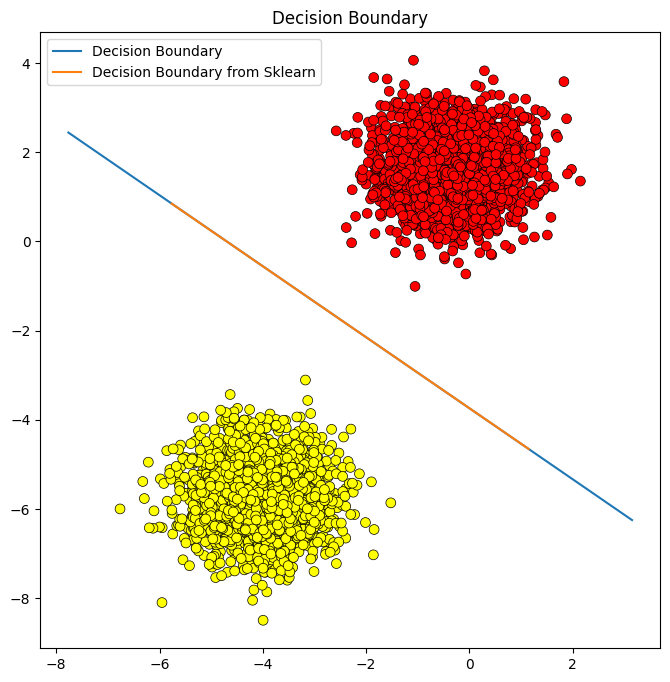

In [ ]:
weights = model.w.flatten()
bias = model.b
x_ = np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100)
y_ = (-weights[0] * x_- bias) / weights[1]

plt.figure(figsize = (8,8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train.flatten(), s=50, cmap='autumn', linewidth=0.5, edgecolors='k')
plt.plot(x_, y_, label='Decision Boundary')

from sklearn.svm import SVC
SVC = SVC(kernel = 'linear', C = 100000000)
SVC.fit(X_train, y_train.flatten())
w = SVC.coef_[0]
b = SVC.intercept_[0]

x_SVC = np.linspace(X_train[:, 0].min() - 1+2, X_train[:, 0].max() + 1-2, 100)
y_SVC = (-w[0] * x_SVC- b) / w[1]
plt.plot(x_SVC, y_SVC, label = 'Decision Boundary from Sklearn')
plt.legend()
plt.title('Decision Boundary')
plt.show()

**CLASSIFICATION REPORT**

Accuracy:  1.0000
Lớp 0: Precision =  1.0000, Recall =  1.0000, F1 Score =  1.0000
Lớp 1: Precision =  1.0000, Recall =  1.0000, F1 Score =  1.0000

               precision    recall  f1-score   support

          -1       1.00      1.00      1.00       247
           1       1.00      1.00      1.00       253

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



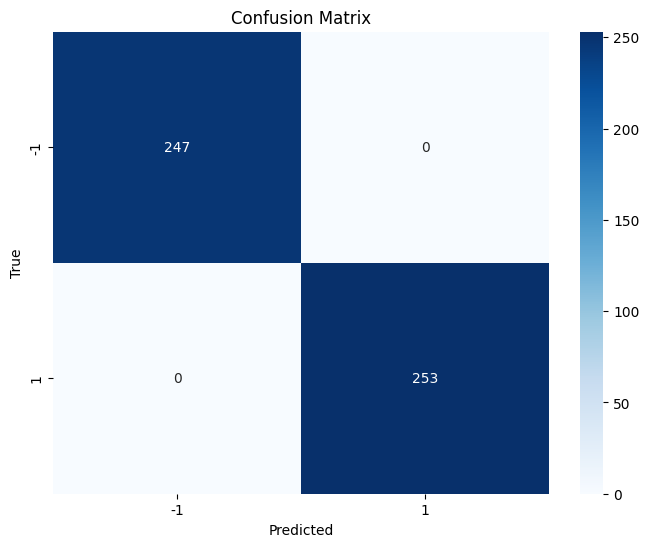

In [ ]:
predictions = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, predictions): .4f}")

precision = precision_score(y_test, predictions, average=None)
recall = recall_score(y_test, predictions, average=None)
f1 = f1_score(y_test, predictions, average=None)

for i in range(len(precision)):
    print(f"Lớp {i}: Precision = {precision[i]: .4f}, Recall = {recall[i]: .4f}, F1 Score = {f1[i]: .4f}")

report = classification_report(y_test, predictions)
print("\n", report)


cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[-1, 1], yticklabels=[-1, 1])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()